In [163]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets,transforms
import os
from model.classifier import Classifier
from model.norm_classifier import PowClassifier
from model.torch_rbf import *
import matplotlib.pyplot as plt
import numpy as np

In [164]:
log_dir = "./log/pos1_norm2_2022_12_23_17_34_51_902926/" 
file_dir = log_dir + "79/"

In [165]:
layer_widths = [28*28, 10]
layer_centres = [20]
basis_func = linear
model = RBFClassifier(layer_widths, layer_centres, basis_func)                                                 # 调用模型Model
model.load_state_dict(torch.load(file_dir+"model_parameter.pkl"))    # 加载模型参数     

<All keys matched successfully>

In [166]:
print(model.rbf_layers[0].centres.shape)

torch.Size([20, 784])


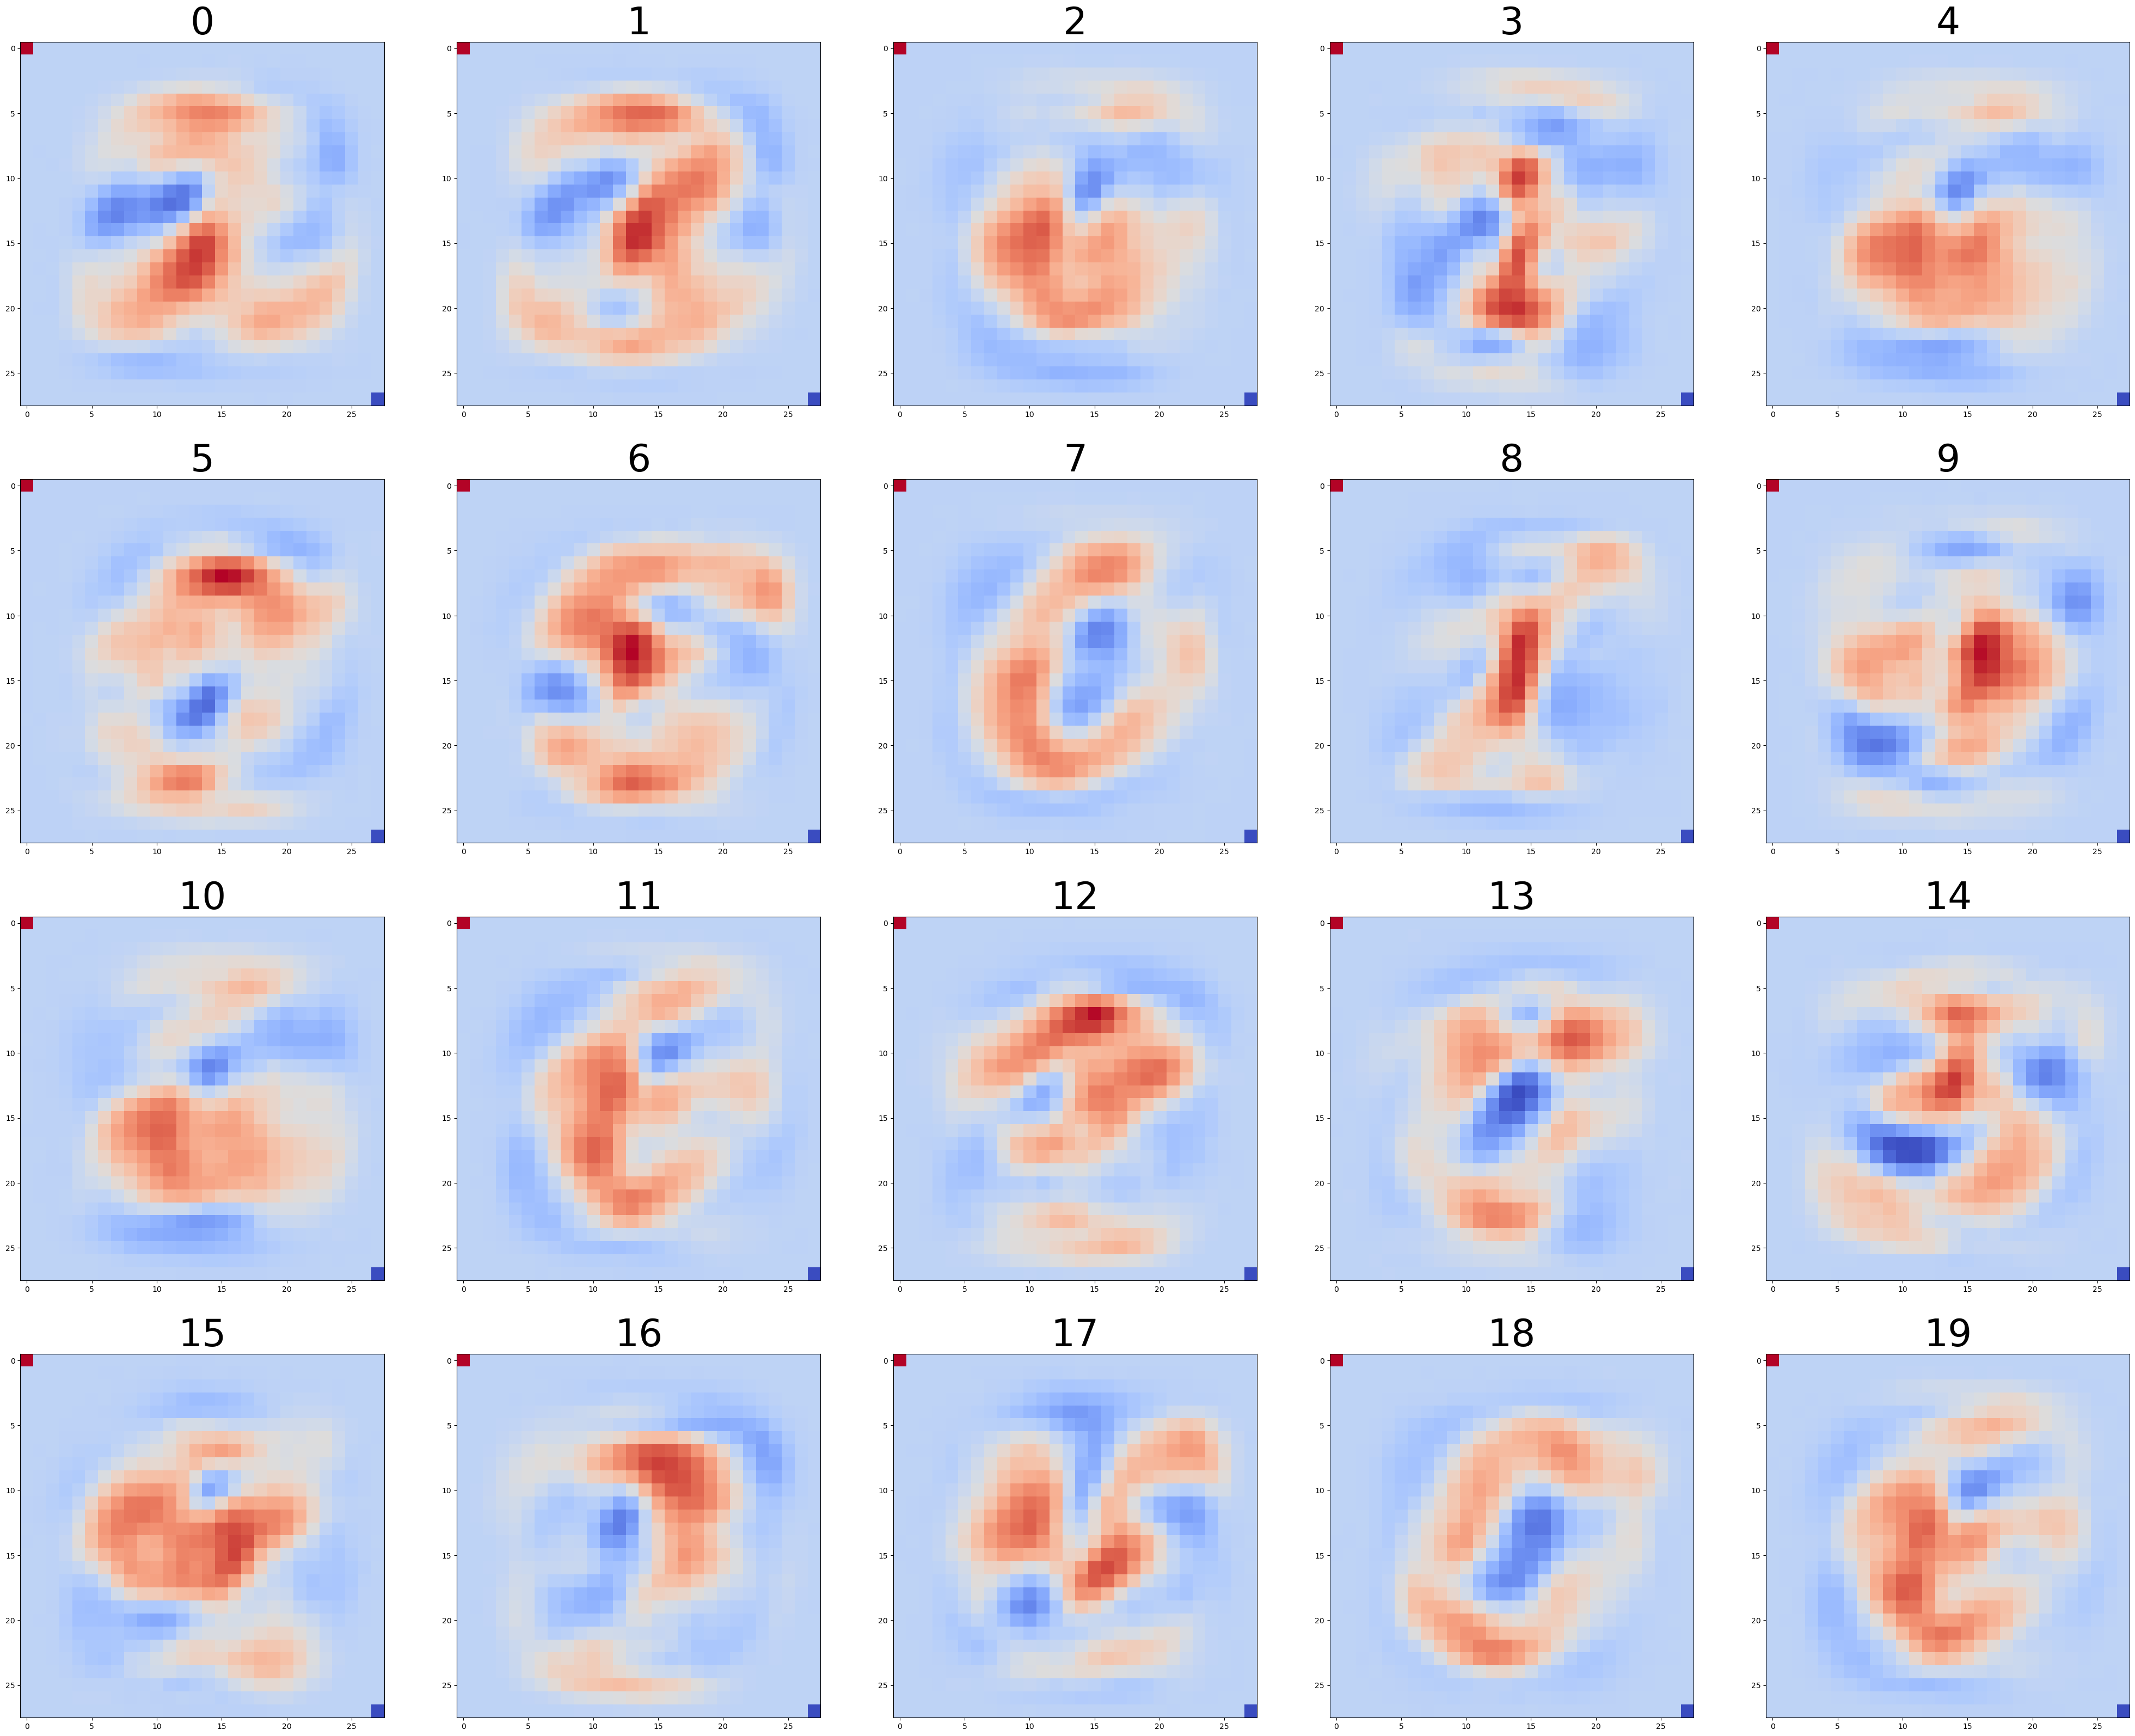

In [167]:
h = model.rbf_layers[0].centres.reshape(20, 28, 28).detach().numpy()
# b = model.b.detach().numpy()
fig, axes = plt.subplots(4, 5, figsize=(50, 40))

img = h

for i in range(4):
    for j in range(5):
        img[i*5+j, 0, 0] = np.max(img)
        img[i*5+j, 27, 27] = np.min(img)
        axes[i,j].imshow(np.tanh(img[i*5+j]/5), cmap='coolwarm')
        axes[i,j].set_title(str(i*5+j+1),{'fontsize':50})



[10.495651   13.43923    -0.7640532  11.61299    -5.4532785  10.851181
  8.908508   19.015837   13.232933   13.941907   -1.564822    4.804764
  4.8064966  15.112739    4.7776637  14.729037   -3.364043   11.70894
 19.18489     0.04133848]


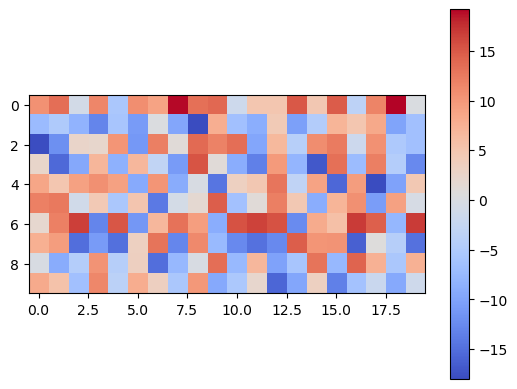

In [169]:
w = model.linear_layers[0].weight.detach().numpy()
# w[np.abs(w)<1e-2]=0
plt.imshow(w, cmap='coolwarm')
plt.colorbar()
print(w[0])